# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Salary` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [3]:
# Read the given CSV file, and view some sample records

salary_data = pd.read_csv("Salary_Data.csv")
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
salary_data.shape

(6704, 6)

In [5]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [7]:
salary_data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [9]:
#Total records are 6704 but all columns are having records less than that so from above we can understand that all columns having null values

### Treating null values

In [10]:
salary_data[salary_data['Age'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#dropping above rows

salary_data = salary_data.dropna(subset=['Age'])

In [12]:
salary_data[salary_data['Age'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [13]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6702 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.5+ KB


In [14]:
# null values treated for Age, Gender and Job Title

In [15]:
#looking at null values in Education level

In [16]:
salary_data[salary_data['Education Level'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2011,27.0,Male,NaN,Developer,7.0,100000.0


In [17]:
#since this row is having all the other details except Education level we will impute value in place of null value

In [19]:
salary_data['Education Level'].value_counts()

Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [20]:
#most of the values are Bachelor's Degree we will impute this value in place of null value

In [28]:
salary_data['Education Level'].fillna(salary_data['Education Level'].mode()[0], inplace=True)

In [29]:
salary_data[salary_data['Education Level'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [31]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6702 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6702 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.5+ KB


In [32]:
#Treating null values in Years of Experience column

In [33]:
salary_data[salary_data['Years of Experience'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN


In [34]:
#Since here Salary is also showing null, it's no use of treating Years of Experience separately

In [35]:
#We will treat Salary column itself for null values

In [36]:
salary_data[salary_data['Salary'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


We are working on predicting Salary only by building the model for now let us drop these rows.

In [38]:
salary_data = salary_data.dropna(subset=['Salary'])

In [39]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6699 non-null   float64
 1   Gender               6699 non-null   object 
 2   Education Level      6699 non-null   object 
 3   Job Title            6699 non-null   object 
 4   Years of Experience  6699 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.4+ KB


#### Now there are no null values.

## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Salary`.

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

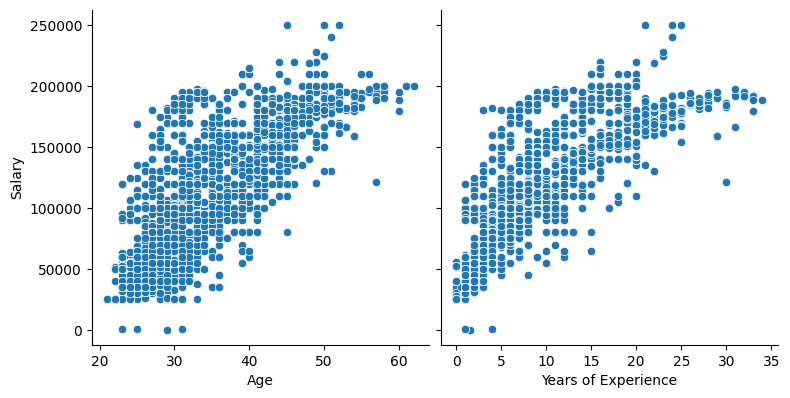

In [44]:
sns.pairplot(salary_data, x_vars=['Age', 'Years of Experience'], y_vars='Salary', size=4, kind='scatter')

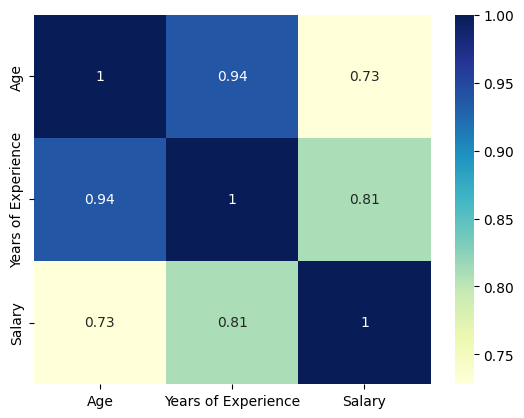

In [48]:
sns.heatmap(salary_data[['Age', 'Years of Experience','Salary']].corr(), cmap="YlGnBu", annot = True)
plt.show()

### As is visible from the pairplot and the heatmap, the variable Years of Experience seems to be most correlated with Salary. So let's go ahead and perform simple linear regression using Years of Experience as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times Years  of  Experience$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `Years of Experience`, in this case, to the variable `X` and the response variable, `Salary`, to the variable `y`.

In [51]:
X = salary_data['Years of Experience']
y = salary_data['Salary']

#### Train-Test Split

You now need to split our variable into training and testing sets. We'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset.

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=17)

In [54]:
#let's now take a look at train data sets

In [55]:
X_train.head()

1837     6.0
3832    13.0
1763     3.0
4536     4.0
284      9.0
Name: Years of Experience, dtype: float64

In [56]:
y_train.head()

1837    115000.0
3832    140000.0
1763     90000.0
4536     70000.0
284     100000.0
Name: Salary, dtype: float64

#### Building a Linear Model

We first need to import the `statsmodels.api` library using which we'll perform the linear regression.

In [58]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below.

In [59]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [60]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [61]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const                  58104.743825
Years of Experience     7032.017594
dtype: float64

In [62]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     8971.
Date:                Tue, 11 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:30:13   Log-Likelihood:                -55131.
No. Observations:                4689   AIC:                         1.103e+05
Df Residuals:                    4687   BIC:                         1.103e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 5.81e+04    

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for Years of Experience is 7032.0176, with a very low p value.

##### 2. R - squared is 0.657
Meaning that 65.7% of the variance in `Salary` is explained by `Years of Experience`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (== 0)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Salary = 58104.74 + 7032.02 \times Years of Experience $

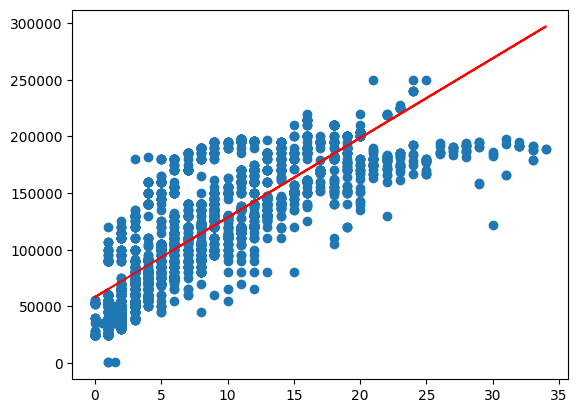

In [63]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 58104.74 + 7032.02*X_train, 'r')
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [64]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

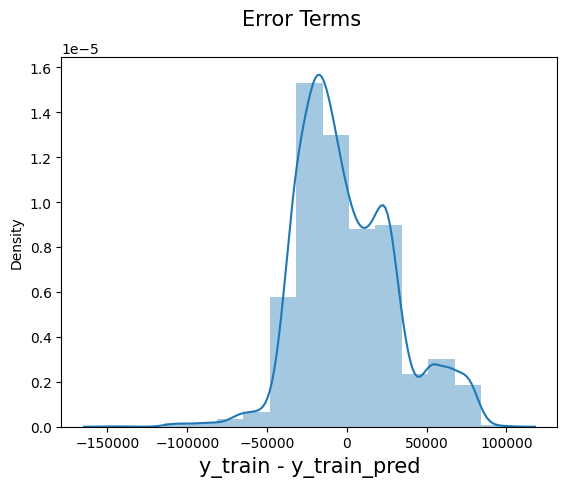

In [65]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are not normally distributed with a mean 0. Means Salary is not only depend on Years of experience but other factors too. But since we are doing linear regressio practice though this model is not fit for linear regression we will try to check how it is depend on Years of experience.

#### Looking for patterns in the residuals

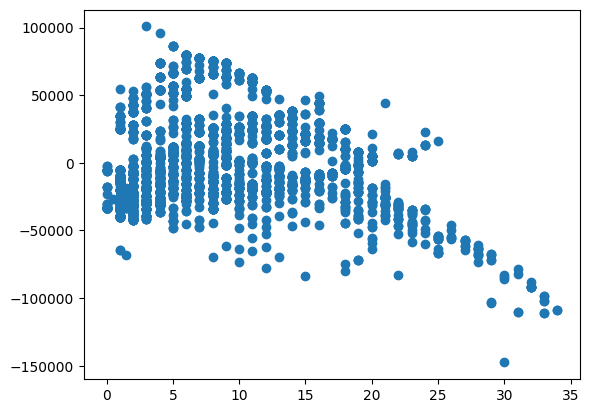

In [66]:
plt.scatter(X_train,res)
plt.show()

## Step 5: Predictions on the Test Set

Now that we have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, we first need to add a constant to the `X_test` data like we did for `X_train` and then we can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [98]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [99]:
y_pred.head()

6244    121392.902167
4426     65136.761419
2577    233905.183663
5428    114360.884573
3043    149520.972541
dtype: float64

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [70]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

31321.264752841103

##### Checking the R-squared on the test set

In [71]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.6487107286475257

##### Visualizing the fit on the test set

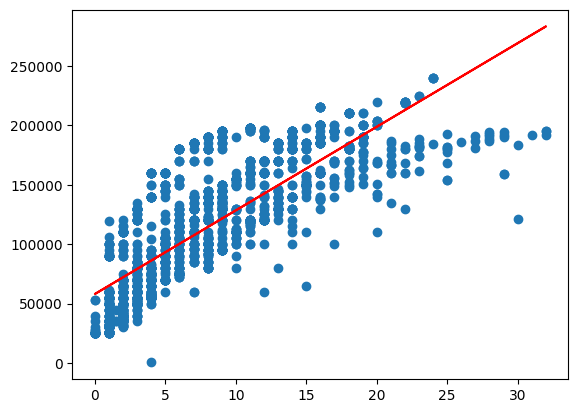

In [73]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.show()

### Checking predicted values by storing them in Dataframe

In [83]:
df_prediction = pd.DataFrame()

In [84]:
df_prediction['Years of Experience']=X_test
df_prediction['Salary']=y_test
df_prediction['Predicted Salary']=round(y_pred,2)

In [85]:
df_prediction

,Years of Experience,Salary,Predicted Salary
6244,9.0,145000.0,121392.90
4426,1.0,25000.0,65136.76
2577,25.0,177177.0,233905.18
5428,8.0,120000.0,114360.88
3043,13.0,140010.0,149520.97
...,...,...,...
4231,1.0,26000.0,65136.76
4458,2.0,37000.0,72168.78
739,5.0,160000.0,93264.83
3530,1.0,32000.0,65136.76


### Linear Regression using `linear_model` in `sklearn`

In [86]:
#splitting the data in train and test 
X_train_lm,X_test_lm,y_train_lm,y_test_lm = train_test_split(X,y, train_size=0.7, random_state=17)

In [87]:
#let us now see the values for X_train_lm and y_train_lm

In [88]:
X_train_lm.head()

1837     6.0
3832    13.0
1763     3.0
4536     4.0
284      9.0
Name: Years of Experience, dtype: float64

In [89]:
y_train_lm.head()

1837    115000.0
3832    140000.0
1763     90000.0
4536     70000.0
284     100000.0
Name: Salary, dtype: float64

In [90]:
X_train_lm.shape

(4689,)

In [91]:
#reshaping it to have 2D array

In [93]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [94]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(4689, 1)
(4689,)
(2010, 1)
(2010,)


In [95]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [96]:
print(lm.intercept_)
print(lm.coef_)

58104.74382510482
[7032.0175935]


In [100]:
y_pred_lm = lm.predict(X_test_lm)

In [102]:
y_pred_lm

array([121392.90216663,  65136.76141861, 233905.18366269, ...,
        93264.83179262,  65136.76141861, 121392.90216663])

##### Looking at the RMSE

In [103]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test_lm, y_pred_lm))

31321.264752841103

##### Checking the R-squared on the test set

In [104]:
r_squared = r2_score(y_test_lm, y_pred_lm)
r_squared

0.6487107286475258

### Checking predicted values by storing them in Dataframe

In [105]:
df_prediction_lm = pd.DataFrame()

In [108]:
df_prediction_lm['Years of Experience']=X_test
df_prediction_lm['Salary']=y_test
df_prediction_lm['Predicted Salary']=y_pred_lm

In [109]:
df_prediction_lm

,Years of Experience,Salary,Predicted Salary
6244,9.0,145000.0,121392.902167
4426,1.0,25000.0,65136.761419
2577,25.0,177177.0,233905.183663
5428,8.0,120000.0,114360.884573
3043,13.0,140010.0,149520.972541
...,...,...,...
4231,1.0,26000.0,65136.761419
4458,2.0,37000.0,72168.779012
739,5.0,160000.0,93264.831793
3530,1.0,32000.0,65136.761419


### <span style="color: blue;">So, from above analysis we have seen that with any method our prediction is same.</span> 